In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis
from scipy.stats import t
from sklearn.metrics import r2_score

In [3]:
def plot_age_vs_income(df):
    """
    
    Plot a scatter plot of Age versus Annual Income (k$) with gender differentiation
    Returns:-None
    
    
    """
    # Create a figure with specified size
    plt.figure(figsize=(10, 6))

    # Scatter plot with Seaborn
    sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender", s=60)

    # Add title and axis labels
    plt.title("Age VS Annual Income (k$)", fontsize=20, color="green")
    plt.xlabel("Age", fontsize=15)
    plt.ylabel("Annual Income (k$)", fontsize=15)

    # Show plot
    plt.show()



In [4]:
def create_corner_plot(df, columns_to_plot):
    """
    Create a corner plot (pair plot or scatter plot matrix) for specified columns of a DataFrame.

    """ 
   
    # Create a corner plot using Seaborn's pairplot function
    sns.pairplot(df[columns_to_plot], diag_kind='kde', markers='o')
    plt.suptitle("Cornerplot", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    # Show the plot
    plt.show()

In [5]:
def plot_doughnut_chart(df):
    """
    Plot a doughnut chart showing the distribution of spending score by gender.
    
    """
    # Calculate total spending score for each gender
    total_spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].sum()

    # Set up the figure and axes
    fig, ax = plt.subplots()

    # Define colors for the doughnut chart
    colors = ['lightblue', 'lightcoral']

    # Create a doughnut chart
    ax.pie(total_spending_by_gender, labels=total_spending_by_gender.index, colors=colors, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 14})

    # Draw a circle at the center to make it a doughnut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')

    # Add a title
    plt.title('Spending Score Distribution by Gender',fontsize=16)

    # Show the plot
    plt.show()

In [6]:
def one_silhouette_inertia(n_clusters, data):
    """
    Calculate silhouette score and inertia for KMeans clustering with a given number of clusters.

    """
    # Initialize KMeans clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    
    # Fit the KMeans model and predict cluster labels
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Calculate inertia
    inertia = kmeans.inertia_
    
    return silhouette_avg, inertia


In [25]:
def plot_elbow_method(start, end, wcss, best_n):
    """
    Plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters
    and mark the optimal number of clusters determined by the elbow method.
    
    """
    plt.figure(figsize=(10,6))
    plt.plot(range(start, end), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of clusters', fontsize=14)
    plt.ylabel('WCSS', fontsize=14)
    plt.title('Elbow Method',fontsize=14)
    plt.axvline(x=best_n, color='r', linestyle='-', linewidth=1, label='Optimal Number of Clusters')
    plt.legend()
    plt.show()



In [8]:
def plot_linear_regression(df):
    """
    Fit a linear regression model to predict annual income based on customer ID.
    
    """
    # Extracting the data
    x = df['CustomerID']  # Predictor variable (CustomerID)
    y = df['Annual Income (k$)']  # Target variable (Annual Income)

    # Reshaping x for sklearn (needed because x is a single feature)
    x = x.values.reshape(-1, 1)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predicting the values
    y_pred = model.predict(x)

    return model, y_pred


In [9]:
df = pd.read_csv("Mall_Customers.csv")

In [10]:
df.rename(columns={"Genre":"Gender"}, inplace=True)

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [14]:
df.duplicated().sum()

0

In [15]:
df_without_id = df.drop(columns=['CustomerID'])
#skewness of attributes
column_skewness = {}


for column in df_without_id.columns:
       if pd.api.types.is_numeric_dtype(df_without_id[column]):
        skewness = skew(df_without_id[column])
        column_skewness[column] = skewness

skewness_df = pd.DataFrame(column_skewness.items(), columns=['Column', 'Skewness'])
skewness_df

,Column,Skewness
0,Age,0.481919
1,Annual Income (k$),0.319424
2,Spending Score (1-100),-0.046865


In [16]:
#Kurtosis values of attributes
column_kurt = {}

for column in df_without_id.columns:
    if pd.api.types.is_numeric_dtype(df_without_id[column]):
        kurt_value = kurtosis(df_without_id[column])  
        column_kurt[column] = kurt_value
        
kurt_df = pd.DataFrame(column_kurt.items(), columns=['Column', 'Kurtosis'])
kurt_df


,Column,Kurtosis
0,Age,-0.684751
1,Annual Income (k$),-0.125893
2,Spending Score (1-100),-0.835958


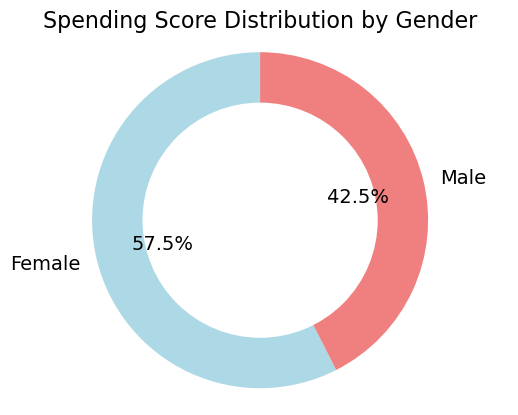

In [17]:
plot_doughnut_chart(df)

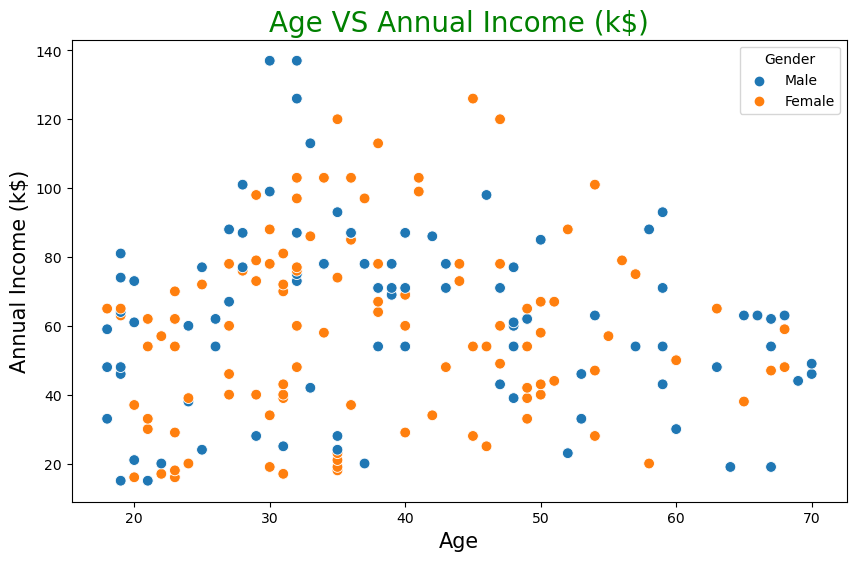

In [18]:
plot_age_vs_income(df)

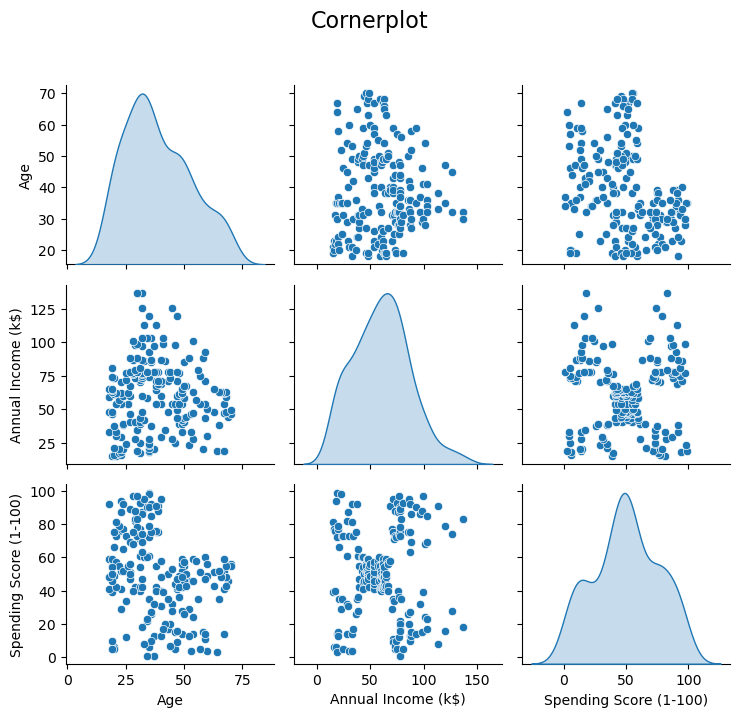

In [19]:
# Specify the columns you want to include in the corner plot
columns_to_plot = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
create_corner_plot(df, columns_to_plot)

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Clustering

In [21]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [22]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [23]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

2 clusters silhouette score = 0.34
3 clusters silhouette score = 0.36
4 clusters silhouette score = 0.40
5 clusters silhouette score = 0.42
6 clusters silhouette score = 0.43
7 clusters silhouette score = 0.42
8 clusters silhouette score = 0.41
9 clusters silhouette score = 0.42
10 clusters silhouette score = 0.40
Best number of clusters = 6


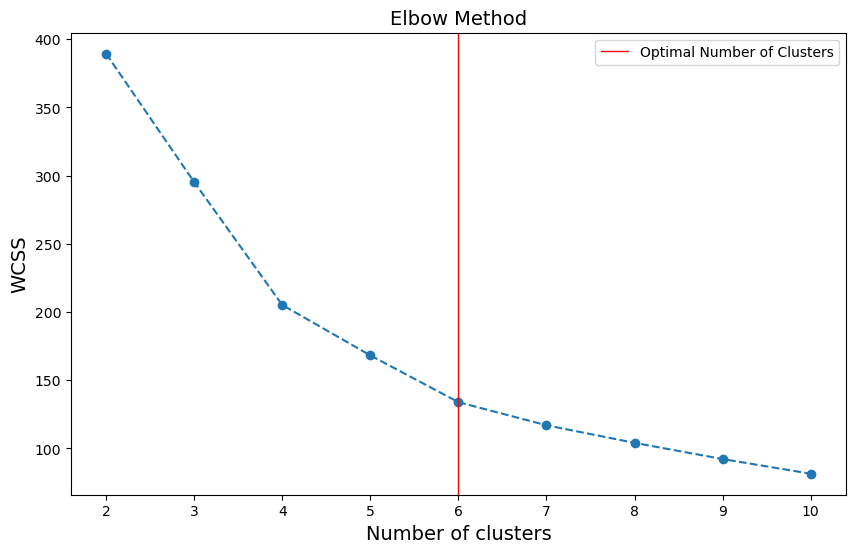

In [26]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhouette_inertia(n, df_scaled_fit)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n} clusters silhouette score = {score:.2f}")

print(f"Best number of clusters = {best_n}")
plot_elbow_method(2, 11, wcss, best_n)


In [27]:
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=6)

kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(var_list)

In [28]:
df["Label"] = kmeans.labels_

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


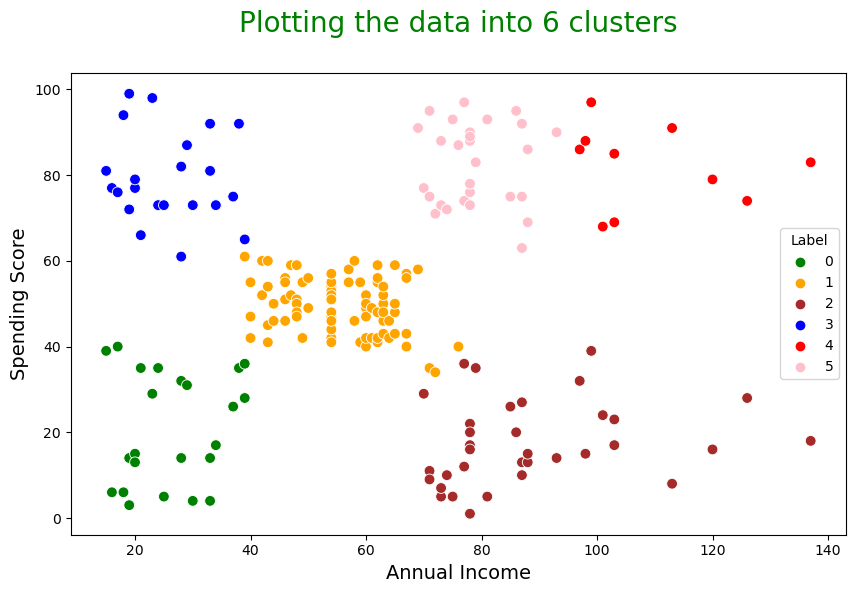

In [30]:
# ScatterPlot when K=6

plt.figure(figsize=(10,6))

plt.title("Ploting the data into 6 clusters\n", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red','pink'])
# Adding labels and title
plt.xlabel('Annual Income',fontsize=14)
plt.ylabel('Spending Score',fontsize=14)
plt.title("Plotting the data into 6 clusters\n", fontsize=20, color="green")

plt.show()

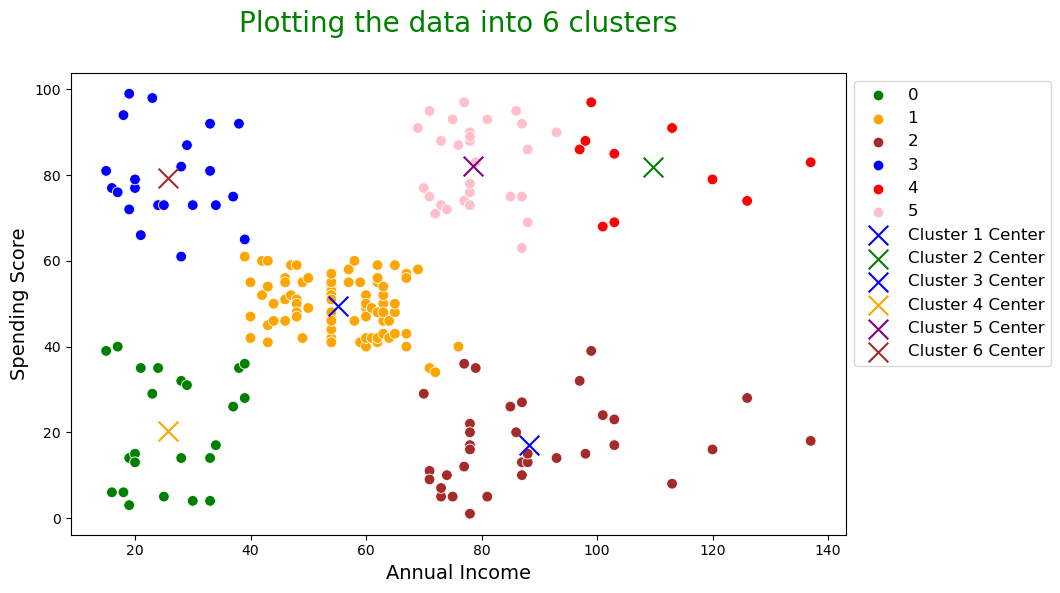

In [31]:
df_cut = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_cut)
inv_norm = scaler.inverse_transform(norm)

# Perform KMeans clustering on the scaled data
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(norm)

# Inverse transform cluster centers to original feature space
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))

# Scatter plot of data points colored by cluster labels
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red','pink'])

# Define a list of colors for the markers
marker_colors = ['b', 'green', 'blue', 'orange', 'purple', 'brown']

# Plot each cluster center individually with a label indicating the cluster number and different color for each marker
for i, center in enumerate(cluster_centers_original):
    plt.scatter(center[0], center[1], c=marker_colors[i], marker='x', s=200,label=f'Cluster {i+1} Center')
# ScatterPlot when K=6


# Adding labels and title
plt.xlabel('Annual Income',fontsize=14)
plt.ylabel('Spending Score',fontsize=14)
plt.title("Plotting the data into 6 clusters\n", fontsize=20, color="green")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize='large')
plt.show()


# Fitting

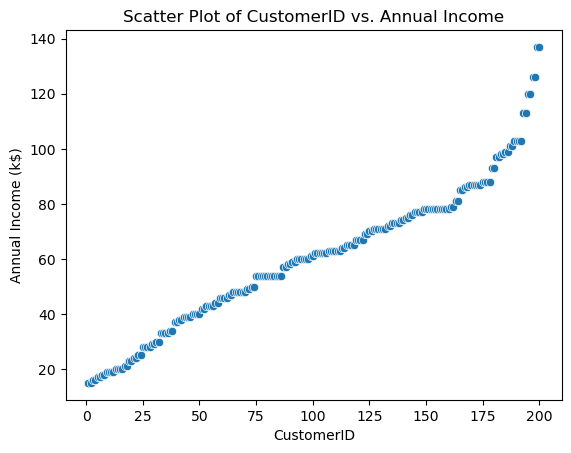

In [32]:

# Scatter plot
sns.scatterplot(data=df, x='CustomerID', y='Annual Income (k$)')

# Add labels and title
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of CustomerID vs. Annual Income')

# Show plot
plt.show()


In [33]:
plot_linear_regression(df)

(LinearRegression(),
 array([ 16.42208955,  16.86568664,  17.30928373,  17.75288082,
         18.19647791,  18.640075  ,  19.08367209,  19.52726918,
         19.97086627,  20.41446336,  20.85806045,  21.30165754,
         21.74525463,  22.18885172,  22.63244881,  23.0760459 ,
         23.51964299,  23.96324008,  24.40683717,  24.85043426,
         25.29403135,  25.73762844,  26.18122553,  26.62482262,
         27.06841971,  27.5120168 ,  27.95561389,  28.39921098,
         28.84280807,  29.28640516,  29.73000225,  30.17359934,
         30.61719643,  31.06079352,  31.50439061,  31.9479877 ,
         32.39158479,  32.83518188,  33.27877897,  33.72237606,
         34.16597315,  34.60957024,  35.05316733,  35.49676442,
         35.94036151,  36.3839586 ,  36.82755569,  37.27115278,
         37.71474987,  38.15834696,  38.60194405,  39.04554114,
         39.48913823,  39.93273532,  40.37633241,  40.8199295 ,
         41.26352659,  41.70712368,  42.15072077,  42.59431786,
         43.0379149

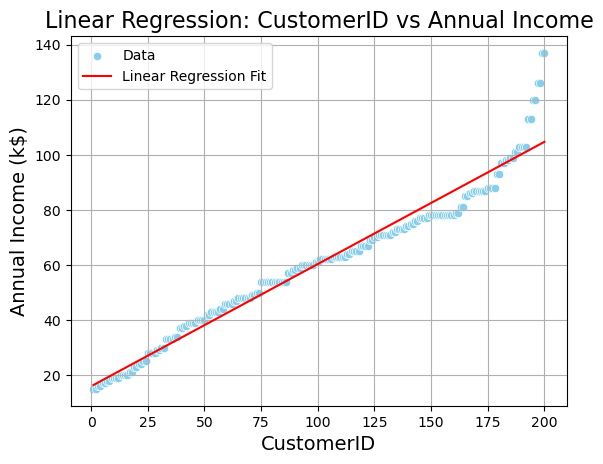

In [46]:

model, y_pred = plot_linear_regression(df)

# Plotting the data and the regression line
sns.scatterplot(data=df,x=df['CustomerID'], y=df['Annual Income (k$)'],marker='o',color='skyblue',label='Data')
plt.plot(df['CustomerID'], y_pred, color='red', label='Linear Regression Fit')
plt.xlabel('CustomerID',fontsize=14)
plt.ylabel('Annual Income (k$)',fontsize=14)
plt.title('Linear Regression: CustomerID vs Annual Income',fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [35]:
model.intercept_

15.97849246231155

In [36]:
model.coef_

array([0.44359709])

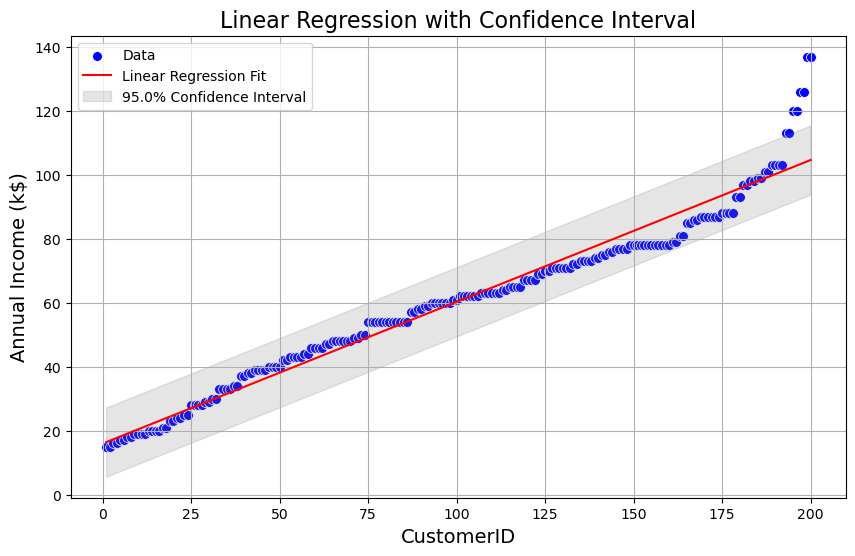

In [40]:
x = df['CustomerID']  # Predictor variable (CustomerID)
y = df['Annual Income (k$)']  # Target variable (Annual Income)
# Calculate standard deviation of residuals as error bars
residuals = y - y_pred
error_bar = np.std(residuals)

confidence=0.95
# Calculate confidence interval bounds
ci_lower = y_pred - error_bar * 1.96  # 95% confidence interval
ci_upper = y_pred + error_bar * 1.96

# Plotting the data with error bars and confidence intervals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.values, y=y, label='Data', color='blue', s=50)
plt.plot(x.values, y_pred, color='red', label='Linear Regression Fit')

# Add error bars and confidence interval

plt.fill_between(x.values, ci_lower, ci_upper, color='gray', alpha=0.2, label=f'{confidence * 100}% Confidence Interval')

plt.xlabel('CustomerID',fontsize=14)
plt.ylabel('Annual Income (k$)',fontsize=14)
plt.title('Linear Regression with Confidence Interval',fontsize=16)
plt.legend()
plt.grid(True)

plt.show()


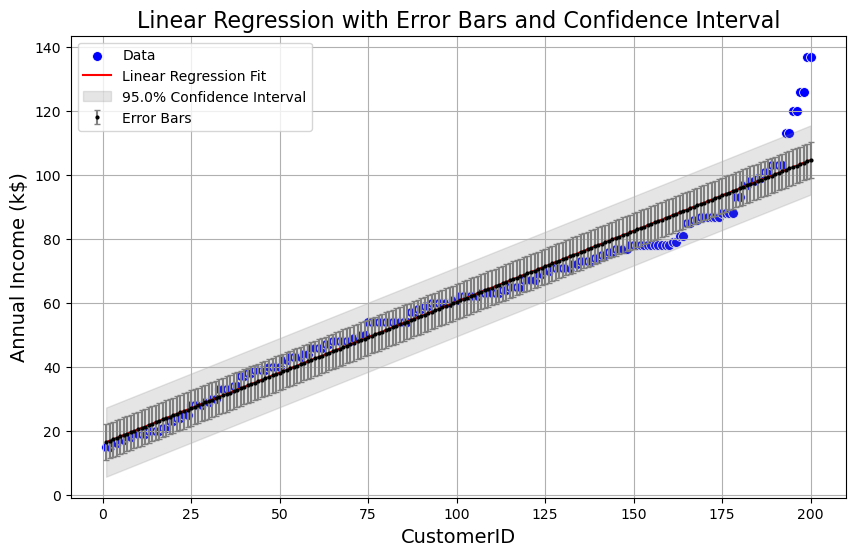

In [41]:
# Calculate standard deviation of residuals as error bars
residuals = y - y_pred
error_bar = np.std(residuals)

# Calculate confidence interval bounds
ci_lower = y_pred - error_bar * 1.96  # 95% confidence interval
ci_upper = y_pred + error_bar * 1.96

# Plotting the data with error bars and confidence intervals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.values, y=y, label='Data', color='blue', s=50)
plt.plot(x.values, y_pred, color='red', label='Linear Regression Fit')

# Add error bars and confidence interval
plt.errorbar(x.values, y_pred, yerr=error_bar, fmt='o', markersize=2, color='black', ecolor='gray', capsize=2, label='Error Bars')
plt.fill_between(x.values, ci_lower, ci_upper, color='gray', alpha=0.2, label=f'{confidence * 100}% Confidence Interval')

plt.xlabel('CustomerID',fontsize=14)
plt.ylabel('Annual Income (k$)',fontsize=14)
plt.title('Linear Regression with Error Bars and Confidence Interval',fontsize=16)
plt.legend()
plt.grid(True)

plt.show()


In [42]:
x = df['CustomerID']  # Predictor variable (CustomerID)
y = df['Annual Income (k$)']  # Target variable (Annual Income)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 30.4748708917723
Root Mean Squared Error (RMSE): 5.520404957226625


In [43]:
# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("Coefficient of Determination (R-squared):", r_squared)

Coefficient of Determination (R-squared): 0.9556009983709288
